**Набор данных CIFAR-10**<br>
Набор данных CIFAR-10 состоит из 60000 цветных изображений размером 32x32 в 10 классах, по 6000 изображений в классе. Имеется 50000 обучающих изображений и 10000 тестовых изображений.<br>

Набор данных разделен на пять обучающих пакетов и один тестовый пакет, в каждом по 10000 изображений. Тестовый пакет содержит ровно 1000 случайно выбранных изображений из каждого класса. Обучающие пакеты содержат остальные изображения в случайном порядке, но некоторые обучающие пакеты могут содержать больше изображений из одного класса, чем из другого. Между ними обучающие пакеты содержат ровно 5000 изображений из каждого класса.
<br>Датасет:<br>
https://www.cs.toronto.edu/~kriz/cifar.html

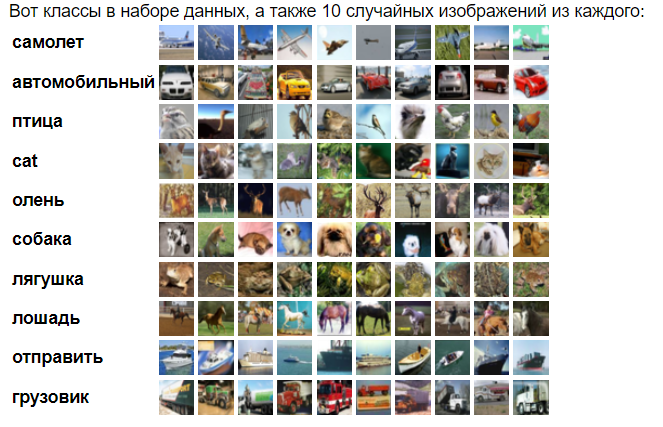

In [25]:
# импортируем библиотеки
import torch
import random
import numpy as np
import torchvision.datasets
import pandas as pd
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
# загружаем сразу в трайн и тест CIFAR10
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

100%|██████████| 170498071/170498071 [00:03<00:00, 47386982.32it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [10]:
# формируем датасеты для обучения, тестирования, целевые переменные
X_train = CIFAR_train.data
y_train = CIFAR_train.targets
X_test = CIFAR_test.data
y_test = CIFAR_test.targets

In [6]:
X_train.shape

(50000, 32, 32, 3)

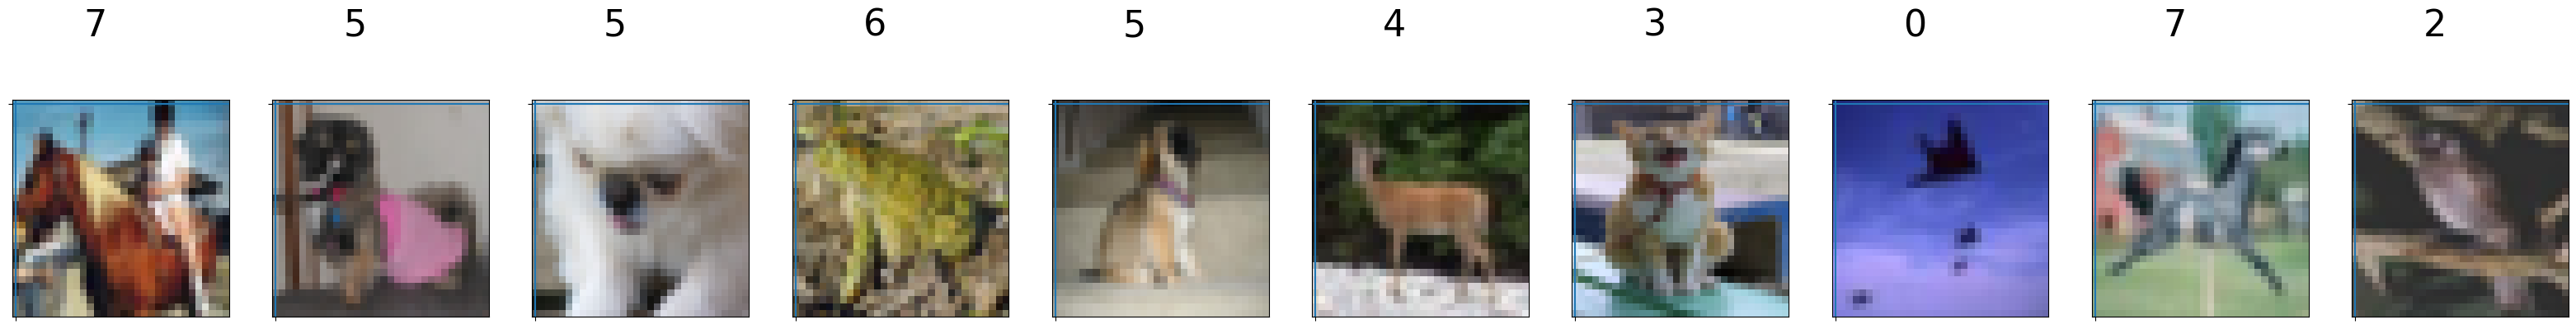

In [7]:
# посмотрим какие-то произвольные изображения из датасета
count = 0
sample_size = 10  # сколько картинок будем смотреть
plt.figure(figsize=(40, 20))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=32)
    plt.imshow(X_train[i])
plt.show()

In [8]:
# сколько изображений в трейне и тесте
len(y_train), len(y_test)

(50000, 10000)

image:
[[[213 229 242]
  [211 227 240]
  [211 227 240]
  ...
  [151 174 206]
  [151 174 206]
  [149 172 204]]

 [[214 229 241]
  [212 227 239]
  [212 227 239]
  ...
  [152 175 207]
  [152 175 207]
  [151 174 205]]

 [[216 229 239]
  [214 227 237]
  [213 227 237]
  ...
  [153 176 206]
  [153 176 206]
  [151 174 204]]

 ...

 [[145 159 165]
  [136 148 154]
  [143 152 158]
  ...
  [216 217 206]
  [196 197 191]
  [183 183 182]]

 [[139 153 159]
  [129 142 148]
  [129 139 145]
  ...
  [227 228 219]
  [223 224 219]
  [209 209 209]]

 [[137 152 157]
  [143 155 161]
  [136 145 152]
  ...
  [209 209 203]
  [217 217 213]
  [228 228 226]]]
8


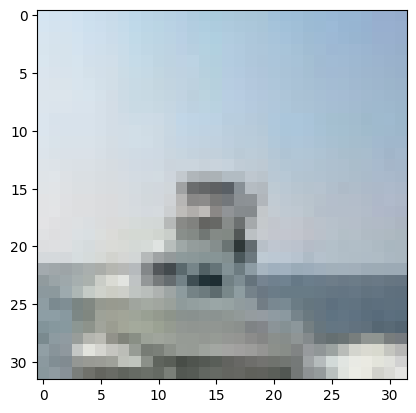

8


In [10]:
# нарисуем, c чем мы имеем дело
import matplotlib.pyplot as plt

im_number = 100
# вот как хранятся изображения в компьютере
print(f"image:\n{X_train[im_number, :, :]}")
# а так их видим мы
plt.imshow(X_train[im_number, :, :])

plt.show()
print(y_train[im_number])

In [11]:
# ВЫВЕДЕМ КЛАССЫ ДАТАСЕТА И ИХ НАЗВАНИЯ
CIFAR_train.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [12]:
# посмотртим тип "картинок"
type(X_train[10, :, :]), type(y_train)

(numpy.ndarray, list)

**Данные представлена массивом ndarray и списком, а для обучения нейронной сети, необходимы данные в формате тензора, поэтому преобразуем их**

In [11]:
# ПРЕОБРАЗОВЫВАЕМ ДАННЫЕ К ТЕНЗОРУ И ДЕЛАЕМ ВЫЩЕСТВЕННЫМ ТИПОМ, КАК Я ПОНЯЛ ЭТО СТАНДАРТНЫЙ ТИП ДАННЫХ ДЛЯ ТЕНЗОРА ДЛЯ ОБУЧЕНИЯ
X_traint = torch.from_numpy(X_train).float()
y_traint = torch.tensor(y_train, dtype=torch.long)
X_testt = torch.from_numpy(X_test).float()
y_testt = torch.tensor(y_test, dtype=torch.long)

In [15]:
# ПРОВЕРИМ ТИПЫ ДАННЫХ
type(X_traint[10, :, :]), type(y_traint)

(torch.Tensor, torch.Tensor)

In [16]:
# ПОСМОТРИМ НА ОСИ ТЕНЗОРА, ЧТОБЫ ПОНИМАТЬ СМОЖЕТ ЛИ СЕТЬ ИХ ПРИНЯТЬ ИЛИ НУЖНО МЕНЯТЬ
X_traint.shape, X_testt.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([10000, 32, 32, 3]))

**Видим, что каналы и размер картинки нужно поменять местами, потому что модель в таком формате принимает данные, что сначала каналы идут, а потом размер**

In [12]:
# МЕНЯЕМ ОСИ МЕСТАМИ, ЧТОБЫ ДАЛЬШЕ НЕ ВОЗНИКЛО ОШИБКИ
X_traint = X_traint.permute(0, 3, 1, 2)
X_testt = X_testt.permute(0, 3, 1, 2)
X_traint.shape, X_testt.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([10000, 3, 32, 32]))

In [13]:
# Определяем класс, которые и будет представлять нашу нейронку
# какие слои - см описание вначале блокнота

# БЫЛО ПЕРЕБРАНО МНОГО ВАРИАНТОВ ПАРАМЕТРОВ, ЭТО ПОКА ЛУЧШИЙ РЕЗУЛЬТАТ, КОТОРЫЙ СМОГ ПОЛУЧИТЬ:
#     32 ВЫХОДНЫХ ФИЛЬТРА НА ПЕРВОМ СВЕРТОЧНОМ СЛОЕ, 32 ФИЛЬТРА ВХОДНЫХ И 64 ВЫХОДНЫХ НА ВТОРОМ СВЕРТОЧНОМ СЛОЕ, ПУЛЛИНГ БЕЗ ИЗМЕНЕНИЙ
#     ФУНКЦИЮ АКТИВАЦИИ ВЫБРАЛ ВЕЗДЕ СИГМОИДУ, Т.К. ДАВАЛА ЛУЧШИЙ РЕЗУЛЬТАТ
#     НА ПЕРВОМ ПОЛНОСВЯЗНОМ СЛОЕ 6 * 6 * 64 ВХОДНЫХ НЕЙРОНОВ И 400 ВЫХОДНЫХ, НА ВТОРОМ 400 И 100 И НА ФИНАЛЬНОМ 100 И 10.

class LeNet5(torch.nn.Module):
    # конструктор. Определям вообще какие слои у нас будут
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=3, out_channels=32, kernel_size=5, padding=2)
        self.act1  = torch.nn.Sigmoid()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=32, out_channels=64, kernel_size=5, padding=0)
        self.act2  = torch.nn.Sigmoid()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(6 * 6 * 64, 400)
        self.act3  = torch.nn.Sigmoid()

        self.fc2   = torch.nn.Linear(400, 100)
        self.act4  = torch.nn.Sigmoid()

        self.fc3   = torch.nn.Linear(100, 10)

    # наша самая главная функция. Определяем, что и в каком порядке будет вызываться
    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

# переменная - наша нейронка
lenet5 = LeNet5()

In [14]:
# определяем, где будет обучаться наша СNN
# если есть граф процессор от Nvidia, то на нем. Если нет, то на cpu

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = "cpu"

# отправляем туда нашу нейронку
lenet5 = lenet5.to(device)

In [15]:
# в качестве функции потерь будем использовать CrossEntropyLoss()
loss = torch.nn.CrossEntropyLoss()

# в качестве оптимайзера, который будет вычислять градиенты и минимизировать функцию потерь, будем использовать Adam (Адаптивная оценка момента)
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [16]:
# БУДЕМ ОПТИМИЗИРОВАТЬ ПО 32 ПАРАМЕТРАМ
batch_size = 32 

# чтобы посмотреть, как и что у нас тут менялось при оптимизации на тестовой выборке
test_accuracy_history = []
test_loss_history = []


train_loss_history = []

# не забываем отправить все выборки на устройство, на котором обучаем
X_testt = X_testt.to(device)
y_testt = y_testt.to(device)

for epoch in range(50): # РЕШИЛ УМЕНЬШИТЬ КОЛИЧЕСТВО ЭПОХ ДО 50, ПОТОМУ ЧТО В ЛЮБОМ СЛУЧАЕ ПОСЛЕ 20 ЭПОХИ МОДЕЛЬ НЕ УЛУЧШАЕТСЯ КАЧЕСТВО И 
    order = np.random.permutation(len(X_traint))
    for start_index in range(0, len(X_traint), batch_size):
        # обязательно обнуляем градиенты
        optimizer.zero_grad()

        # берем пачку параметров
        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_traint[batch_indexes].to(device)
        y_batch = y_traint[batch_indexes].to(device)

        # делаем предсказание
        preds = lenet5.forward(X_batch)

        # считаем лосс значение
        loss_value = loss(preds, y_batch)

        # берем градиенты
        loss_value.backward()

        # и пусть оптимайзер все оптимизирует
        optimizer.step()

    # смотрим, что он тут нам напредсказывал, не забывая вовремя отправлять на cpu
    train_loss_history.append(loss_value.data.cpu())
    test_preds = lenet5.forward(X_testt)
    test_loss_history.append(loss(test_preds, y_testt).data.cpu())


    accuracy = (test_preds.argmax(dim=1) == y_testt).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(f"epoch{epoch} - accuracy test {accuracy} ")

epoch0 - accuracy test 0.41509997844696045 
epoch1 - accuracy test 0.4966000020503998 
epoch2 - accuracy test 0.5076999664306641 
epoch3 - accuracy test 0.5645999908447266 
epoch4 - accuracy test 0.6049999594688416 
epoch5 - accuracy test 0.6196999549865723 
epoch6 - accuracy test 0.6322000026702881 
epoch7 - accuracy test 0.6118999719619751 
epoch8 - accuracy test 0.6636999845504761 
epoch9 - accuracy test 0.6692000031471252 
epoch10 - accuracy test 0.6604999899864197 
epoch11 - accuracy test 0.6545000076293945 
epoch12 - accuracy test 0.655299961566925 
epoch13 - accuracy test 0.6721999645233154 
epoch14 - accuracy test 0.6690999865531921 
epoch15 - accuracy test 0.6661999821662903 
epoch16 - accuracy test 0.667199969291687 
epoch17 - accuracy test 0.6538999676704407 
epoch18 - accuracy test 0.6676999926567078 
epoch19 - accuracy test 0.6596999764442444 
epoch20 - accuracy test 0.668999969959259 
epoch21 - accuracy test 0.6496999859809875 
epoch22 - accuracy test 0.6645999550819397 


/tmp/ipykernel_30/242713225.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


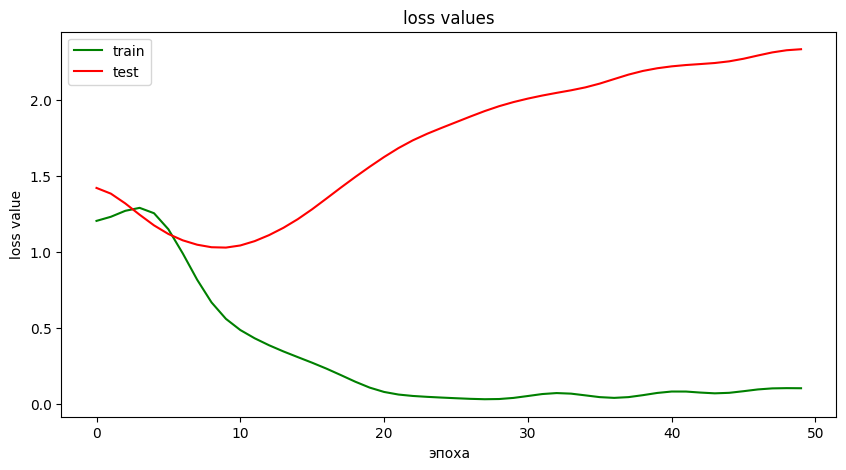

In [21]:
# строим графики - функции потерь
from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set(title = 'loss values',
       xlabel = 'эпоха',
       ylabel = 'loss value')
train_loss_smoothed = gaussian_filter1d(train_loss_history, sigma=2)
ax.plot(train_loss_smoothed, color='green',  label='train')

test_loss_smoothed = gaussian_filter1d(test_loss_history, sigma=2)
ax.plot(test_loss_smoothed, color='red',  label='test')
ax.legend()
plt.show()

/tmp/ipykernel_30/2679742005.py:3: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


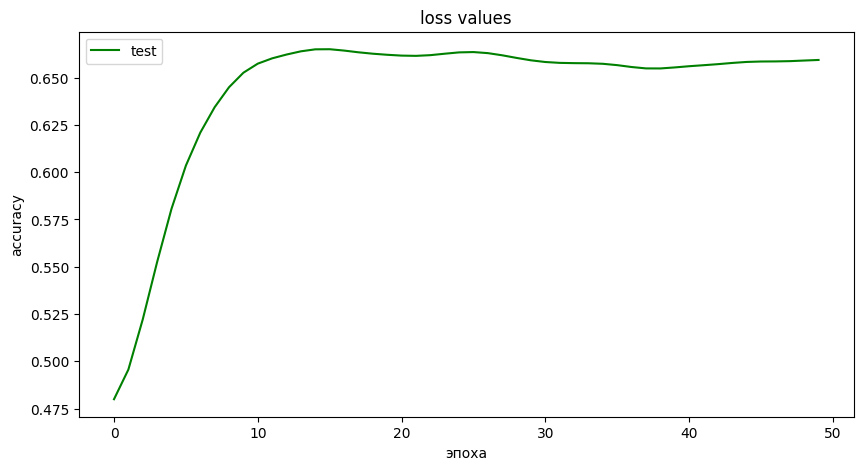

In [22]:
# График изменения accuracy на тестовых данных

from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set(title = 'loss values',
       xlabel = 'эпоха',
       ylabel = 'accuracy')
test_accuracy_smoothed = gaussian_filter1d(test_accuracy_history, sigma=2)
ax.plot(test_accuracy_smoothed, color='green',  label='test')

ax.legend()
plt.show()


# Сохранение и использование модели

In [28]:
# сохраняем произвольное число из датасета (тензор) в файл
rand = random.randint(0,10000)
timg = X_traint[rand]
torch.save(timg,'tensor.pt')

In [31]:
print(rand)

6311


In [33]:
# смотрим размер тензора - изображения
timg.size()

torch.Size([3, 32, 32])

In [34]:
# и размер того, что изначально скармливали нейронке.
# тензор подобного размера надо будет скормить нейронке для предсказания
X_testt.size()
# то есть нам нужен тензор размера [1,1,28,28]

torch.Size([10000, 3, 32, 32])

In [36]:
# вот так сохраняют модель с помощью pickle
import pickle

with open("model.pickle", "wb") as pickle_file:
    pickle.dump(lenet5, pickle_file)

In [37]:
import torch.nn as nn

# Считываем модель, сохраненную с помощью pickle
with open("model.pickle", "rb") as ifile:
    modelp = pickle.load(ifile)

# загружаем наше изображение
test_data = torch.load('tensor.pt')

# смотрим, что пришло из pickle файла
print(modelp)


/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/tmp/ipykernel_30/4174620253.py:

LeNet5(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (act1): Sigmoid()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (act2): Sigmoid()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=2304, out_features=400, bias=True)
  (act3): Sigmoid()
  (fc2): Linear(in_features=400, out_features=100, bias=True)
  (act4): Sigmoid()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [38]:
# смотрим тип модели
type(modelp)

__main__.LeNet5

torch.Size([3, 32, 32])


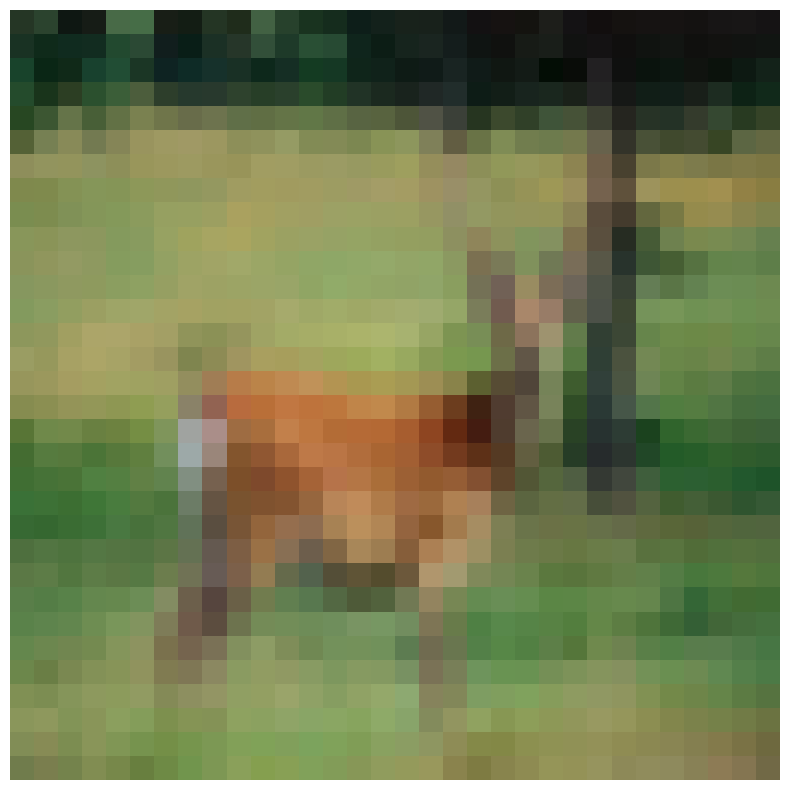

In [44]:
# Проверяем размерности изображения
print(test_data.shape)  # Должно вывести: torch.Size([3, 32, 32])

# Преобразуем тензор из (C, H, W) в (H, W, C) для корректного отображения
image = test_data.permute(1, 2, 0).numpy()  # (C, H, W) -> (H, W, C)

# Нормализуем изображение, если значения больше 1
if image.max() > 1:
    image = image / 255.0

# Увеличиваем размер изображения для отображения
plt.figure(figsize=(10, 10))

# Отображаем изображение в нормальных цветах
plt.imshow(image)
plt.axis('off')  # Отключаем оси
plt.show()

In [45]:
# переводим входной тензор-изображение в тензор нужного нам размера
t_data = torch.tensor([test_data.numpy()])

/tmp/ipykernel_30/3192455546.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  t_data = torch.tensor([test_data.numpy()])


In [46]:
# проверяем
t_data.shape

torch.Size([1, 3, 32, 32])

In [47]:
# проверяем, на чем можем считать
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# отправляем туда модель
modelp.to(dev)
model_data = modelp.to(dev)

# тензор-изображение тоже
t_data = t_data.to(dev)

In [48]:
# делаем предсказание
preds = modelp.forward(t_data)

In [49]:
# в каком виде получаем предсказание. Это вектор 10x1 с вероятностями принадлежности объекта к определенному классу
print(preds)

tensor([[-15.3154, -12.0656,  -1.8961,  -5.7570,  13.8863,  -5.0114,  -6.3636,
          -3.6089, -16.9281, -13.7614]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [50]:
# выбираем максимальную вероятность, как результат предсказания.
# Не забывая отправить на cpu
prediction = np.argmax(preds.to('cpu').detach().numpy(),axis=1)

In [52]:
# Словарь для сопоставления цифры с названием класса
labels_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [54]:
type(prediction)

numpy.ndarray

In [57]:
# Выводим предсказанные классы с их названиями
for pred in prediction:
    print(f"Prediction: {pred}, Label: {labels_dict.get(pred, 'Unknown class')}")

Prediction: 4, Label: deer


**Олень предсказан верно.**